In [7]:
%matplotlib notebook

In [21]:
import numpy as np
import random
import itertools
from graph_tool import Graph, GraphView
from graph_tool.generation import lattice
from graph_tool.draw import graph_draw
from tqdm import tqdm

from matplotlib import pyplot as plt

from viz_helpers import lattice_node_pos
from minimum_steiner_tree import min_steiner_tree
from cascade_generator import si, observe_cascade
from eval_helpers import infection_precision_recall
from graph_helpers import add_ve_filters

from inference import infer_infected_nodes
from query_selection import RandomQueryGenerator, OurQueryGenerator, PRQueryGenerator
from experiment import gen_input, one_round_experiment

In [20]:
shape = (10, 10)
g = lattice(shape)

In [25]:
scores = {
    'random': [],
    'pagerank': [],
    'ours': []
}

for i in tqdm(range(10)):
    obs, c = gen_input(g, stop_fraction=0.25)
    
    # for rand method
    rand_gen = RandomQueryGenerator(add_ve_filters(g), obs)
    score = one_round_experiment(g, obs, c, rand_gen, 'random', 20)
    scores['random'].append(score)
    
    # for our method
    our_gen = OurQueryGenerator(add_ve_filters(g), obs, num_spt=20, num_stt=5)
    score = one_round_experiment(g, obs, c, our_gen, 'ours', 20)    
    scores['ours'].append(score)
    
    # for our pagerank
    pr_gen = PRQueryGenerator(add_ve_filters(g), obs)
    score = one_round_experiment(g, obs, c, pr_gen, 'pagerank', 20)    
    scores['pagerank'].append(score)


100%|██████████| 10/10 [07:51<00:00, 47.38s/it]


In [39]:
rand_mean_scores = np.mean(np.asarray(scores['random']), axis=0)
our_mean_scores = np.mean(np.asarray(scores['ours']), axis=0)
pr_mean_scores = np.mean(np.asarray(scores['pagerank']), axis=0)

<IPython.core.display.Javascript object>


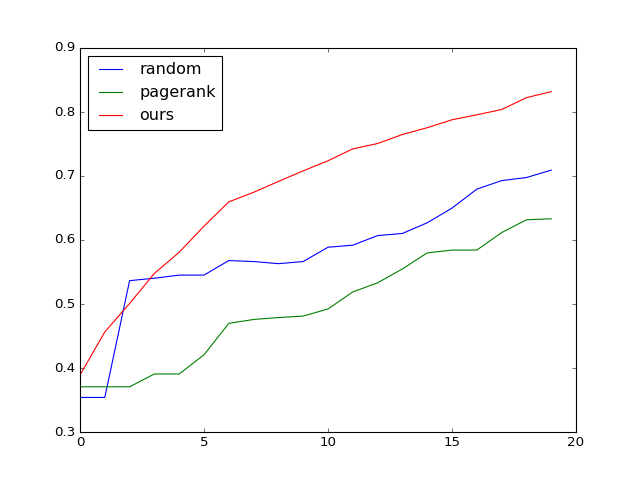

In [40]:
rand_prec, rand_rec = zip(*rand_mean_scores)
pr_prec, pr_rec = zip(*pr_mean_scores)
our_prec, our_rec = zip(*our_mean_scores)
fig = plt.figure()
fig.clf()
plt.plot(rand_prec)
plt.plot(pr_prec)
plt.plot(our_prec)
plt.legend(['random', 'pagerank', 'ours'], loc='upper left')

<IPython.core.display.Javascript object>


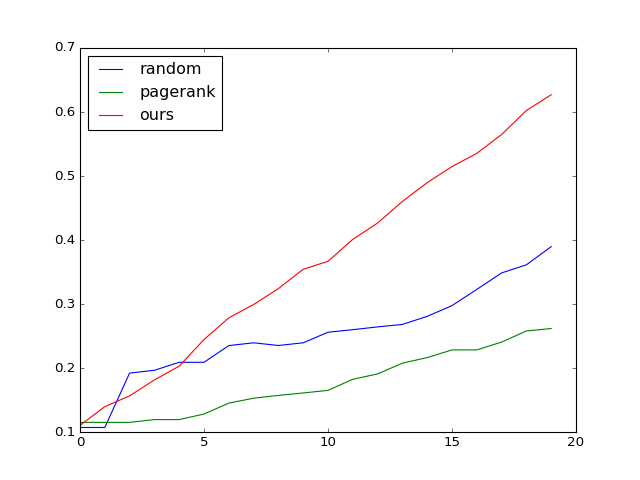

In [41]:
plt.figure()
plt.plot(rand_rec)
plt.plot(pr_rec)
plt.plot(our_rec)
plt.legend(['random', 'pagerank', 'ours'], loc='upper left')